# IMPORTS

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
import math
from collections import Counter
np.set_printoptions(threshold=sys.maxsize)

# PART 1

In [12]:
def parse():
    inputfile = input("Enter PDB file name: ")
    f = open("/Users/MacBook/Downloads/{}".format(inputfile),"r")
    atomList=[]
    atom_count=0
    wholeFile=f.readlines()
    for line in wholeFile:
        if line.startswith("HELIX"):
            line=line.split()
            (hstart, hstop) = (int(line[5]), int(line[8]))
        elif line.startswith("SHEET"):
            line=line.split()
            (bstart, bstop) = (int(line[6]), int(line[9]))
        elif line.startswith("ATOM") and "CA" in line: 
            line=line.split()
            (atom_num, residue, x, y, z) = (line[1], line[3], line[6], line[7], line[8]) 
            line = (atom_num, residue, x, y, z)
            new=[]
            atomList.append(new)
            atomList[atom_count].extend(line)
            atom_count+=1
    for line in atomList:
        if atomList.index(line) in range(hstart, hstop + 1):
            line.append('HELIX')
        elif atomList.index(line) in range(bstart, bstop + 1):
            line.append('SHEET')
        else:
            line.append('NONE')
    return atom_count, atomList

def contact_map():
    atom_count, atomList = parse()
    zeros = np.zeros((atom_count, atom_count))    
    for line in atomList:
        for line2 in atomList:
            d = math.sqrt(((float(line[2])-float(line2[2]))**2) + ((float(line[3])-float(line2[3]))**2) + ((float(line[4])-float(line2[4]))**2))
            if d <=6:
                zeros[atomList.index(line)][atomList.index(line2)] = 1
            else:
                zeros[atomList.index(line)][atomList.index(line2)] = 0
    plt.figure(figsize = (7,7))
    plt.imshow(zeros, cmap='Greys',  interpolation='nearest')
    plt.show()
    return zeros, atomList

# PART 2

In [13]:
def test_slice(mat):
    window = int(input("Enter window size (int): "))
    width = len(mat[0])
    height = len(mat)
    slices = []
    for i in range(0, height - window + 1):
        for j in range(0, height - window + 1):
            new_slice = [
                    [mat[a][b] for b in range(j, j + window)]
                    for a in range(i, i + window)
                ]
            new_slice.append([j, i, 0])
            slices.append(new_slice)
    return slices, window

def dense(mat, atomic):
    slices, window = test_slice(mat)
    max_total = 0
    best_slice = None
    for s in slices:
        total = np.sum(s[:-1])   
        if total >= max_total:
            best_slice = s
            max_total = total
    print('WINDOW:')
    for line in best_slice[:-1]:
        print(line)

    x = best_slice[window][0]
    y = best_slice[window][1]
    helix_total = 0
    sheet_total = 0
    print('CORRESPONDING AMINO ACIDS:')
    for line in atomic[x:x+window]:
        print(line[:-1])
        if line[-1] == 'HELIX':
            helix_total+= 1
        elif line[-1] == 'SHEET':
            sheet_total+= 1
    print("Number of Alpha-Helices: ", helix_total)
    print("Number of Beta Sheets: ", sheet_total)

# PART 3

In [14]:
def compare(mat):
    size = int(input("Enter submatrix size (int): "))
    width = len(mat[0])
    height = len(mat)
    sub = []
    for i in range(0, height - size + 1):
        for j in range(0, width - size + 1):
            new_sub = [
                    [mat[a][b] for b in range(j, j + size)]
                    for a in range(i, i + size)
                ]
            sub.append(new_sub)
    empty = []
    for s in sub:
        total = np.sum(s)
        if total >= 10:
            empty.append(list(itertools.chain(*s)))
        
    c = Counter(map(tuple,empty))
    for items in c:
        print("FREQUENCY:", c[items])
        print('TOTAL:', np.sum(items))
        items = np.asarray(items)
        B = np.reshape(items, (-1, size))
        print(B)
        print('\n')

# MAIN FUNCTION

Enter PDB file name: 3nir.pdb


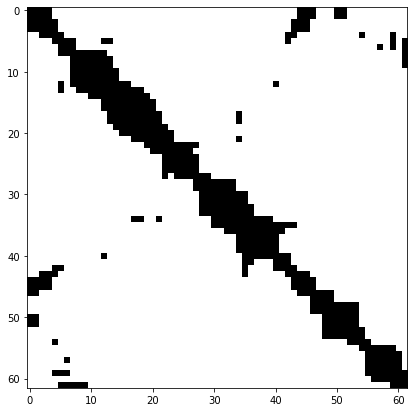



Enter window size (int): 10
WINDOW:
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
CORRESPONDING AMINO ACIDS:
['177', 'ALA', '10.923', '-5.730', '5.714']
['187', 'ARG', '8.653', '-4.582', '8.562']
['211', 'SER', '7.427', '-1.567', '6.596']
['223', 'AASN', '6.631', '-3.764', '3.624']
['224', 'BASN', '6.705', '-3.962', '3.668']
['251', 'APHE', '4.949', '-6.246', '6.024']
['252', 'BPHE', '4.912', '-6.411', '5.882']
['290', 'ASN', '2.680', '-3.622', '7.319']
['304', 'VAL', '1.661', '-2.534', '3.797']
['320', 'CYS', '1.047', '-6.177',

In [15]:
def main():
    #PART 1
    zeros, atomList = contact_map()
    print('\n')
    #PART 2
    dense(zeros, atomList)
    print('\n')
    #PART 3
    compare(zeros)
if __name__ == "__main__":
    main()